In [2]:
# import the library

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns
import cv2
import tensorflow as tf
from PIL import Image

# set the random seed for tensorflow
tf.random.set_seed(1234)

2024-05-03 17:22:56.296953: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-03 17:22:56.297357: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-03 17:22:56.299701: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-03 17:22:56.328404: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-03 17:22:56.905672: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

In [3]:
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [4]:
# load the mnist dataset from keras
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
# shape of the dataset
print("Shape of the training dataset: ", x_train.shape)
print("Shape of the testing dataset: ", x_test.shape)

Shape of the training dataset:  (60000, 28, 28)
Shape of the testing dataset:  (10000, 28, 28)


**Training Data**

60,000 images
Each image is 28x28 pixels in size

**Test Data**

100,000 images
Each image is 28x28 pixels in size

**All are gray scale imaged**

In [6]:
x_train[0].shape # shape of the first image 28x28

(28, 28)

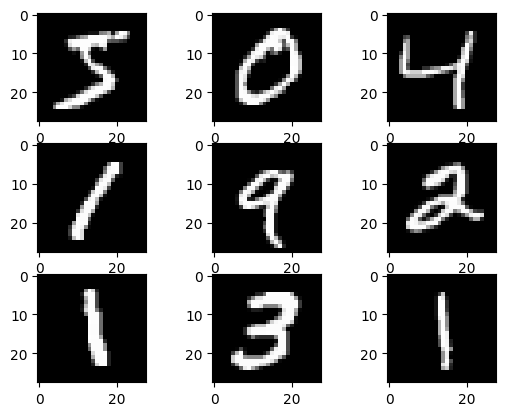

In [7]:
# plot the first 9 images
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))

In [8]:
# the unique values in the training dataset
print("Unique values in the training dataset: ", np.unique(y_train))

Unique values in the training dataset:  [0 1 2 3 4 5 6 7 8 9]


In [9]:
# normalize the dataset
x_train = x_train / 255.0
x_test = x_test / 255.0

In [10]:
# import the required libraries for the model

from keras.models import Sequential
from keras.layers import Dense, Flatten, Input

In [11]:
model = Sequential()

In [12]:
model.add(Input(shape=(28, 28)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

2024-05-03 17:22:59.137615: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-03 17:22:59.140996: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# train the model
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 801us/step - accuracy: 0.8716 - loss: 0.4475
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 783us/step - accuracy: 0.9606 - loss: 0.1293
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 779us/step - accuracy: 0.9749 - loss: 0.0835
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 776us/step - accuracy: 0.9828 - loss: 0.0588
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 779us/step - accuracy: 0.9879 - loss: 0.0425
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 778us/step - accuracy: 0.9916 - loss: 0.0311
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 772us/step - accuracy: 0.9940 - loss: 0.0231
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 770us/step - accuracy: 0.9954 - loss: 0.0179
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 771us/step - accuracy: 0.9958 - loss: 0.0151
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 766us/step - accuracy: 0.9958 - loss: 0.0135


In [14]:
# evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - accuracy: 0.9730 - loss: 0.1216


In [15]:
loss, accuracy

(0.09715023636817932, 0.9772999882698059)

In [16]:
# print X_test shape
print("X_test shape: ", x_test.shape)

X_test shape:  (10000, 28, 28)


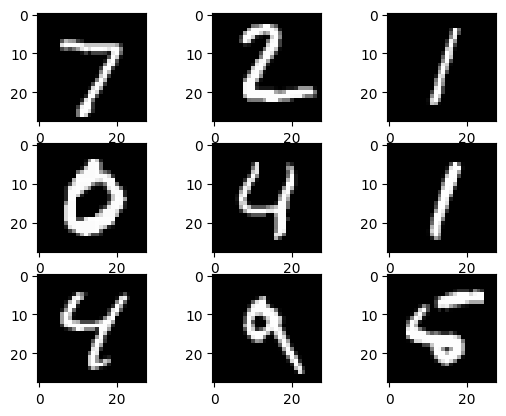

In [17]:
# display the first 9 images
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_test[i], cmap=plt.get_cmap('gray'))

In [18]:
# print Y_test values
print("Y_test values: ", y_test[:9])

Y_test values:  [7 2 1 0 4 1 4 9 5]


In [19]:
# make predictions
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step


In [20]:
# shape of the predictions
print("Shape of the predictions: ", predictions.shape)

Shape of the predictions:  (10000, 10)


In [21]:
# get the index of the highest probability
predictions = np.argmax(predictions, axis=1)

In [22]:
# predictions shape
print("Shape of the predictions: ", predictions.shape)

# print the first 9 predictions
print("First 9 predictions: ", predictions[:9])

Shape of the predictions:  (10000,)
First 9 predictions:  [7 2 1 0 4 1 4 9 5]


In [23]:
# confusion matrix
cm = confusion_matrix(y_test, predictions)
print(cm)

tf.Tensor(
[[ 968    0    0    0    1    2    1    2    4    2]
 [   0 1124    4    0    0    0    2    2    3    0]
 [   6    1 1008    5    1    0    2    5    3    1]
 [   1    0    0 1001    0    1    0    2    2    3]
 [   2    0    4    1  957    0    1    2    1   14]
 [   2    0    0   23    2  855    1    0    7    2]
 [   4    2    6    2    9    8  924    0    3    0]
 [   1    3    8    3    0    0    0 1002    4    7]
 [   3    0    3   10    4    1    0    3  945    5]
 [   1    2    1    7    5    3    0    0    1  989]], shape=(10, 10), dtype=int32)


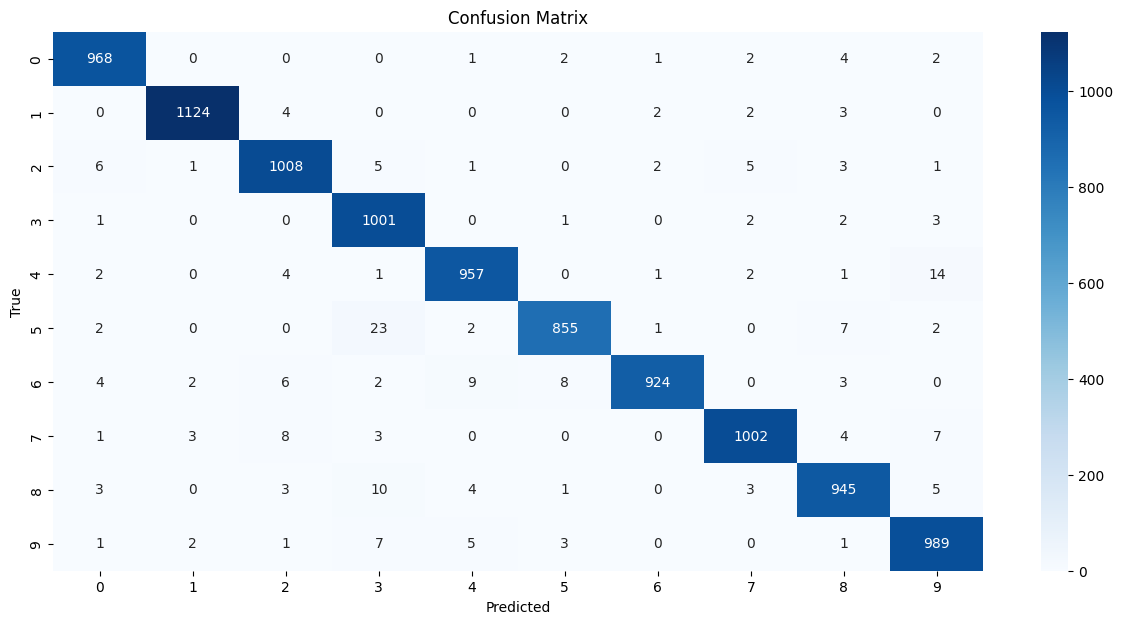

In [24]:
# plot the confusion matrix
plt.figure(figsize=(15, 7))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [25]:
# building the predictive system
def predict_image(image):
    # load the image
    image = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
    # resize the image
    image = cv2.resize(image, (28, 28))
    # invert the image
    image = cv2.bitwise_not(image)
    # normalize the image
    image = image / 255.0
    # reshape the image
    image = image.reshape(1, 28, 28)
    # make the prediction
    prediction = model.predict(image)
    # get the index of the highest probability
    prediction = np.argmax(prediction, axis=1)
    return prediction[0]

In [26]:
# test the model
image = 'test_image.jpg'

In [27]:
# make prediction
prediction = predict_image(image)
print("Prediction: ", prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Prediction:  5


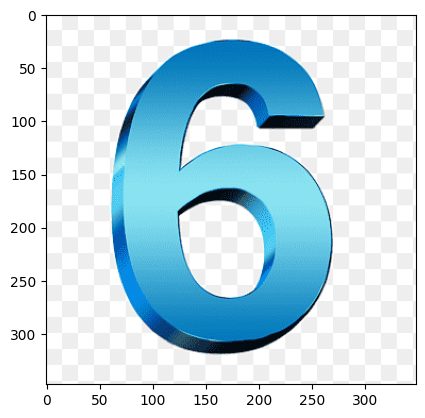

In [28]:
import cv2

image2 = 'test_image2.png'

# show the image2 using cv2
img = cv2.imread(image2)
plt.imshow(img)